# Brief

With the advancement of technology and the widespread availability of the internet, online gaming has gained increasing societal recognition. Observations reveal that Western countries excel in FPS games (e.g., APEX, CS), while Asian countries dominate in MOBA games (e.g., LOL). This raises the question: Do regions or countries influence players' gaming abilities? Prior research suggests that cultural preferences and enthusiasm for specific game genres drive players in certain regions to invest more time and resources, enhancing their competitive performance (Parshakov, et al., 2018, Luo, et al., 2024). Another study highlights links between online gaming and neural-cognitive functions, such as attention (Goldstein and Volkow, 2002), cognitive control (Powers et al., 2013), visuospatial skills (Dye et al., 2009), and reward processing (Asensio et al., 2010). Could regional differences in neural and cognitive development explain these patterns?


At the beginning, I imported all the libraries needed for this final project, including pandas, matplotlib, seaborn, and MANOVA. Pandas was used for data manipulation, matplotlib for plotting figures, seaborn to enhance statistical visualizations in conjunction with pandas and matplotlib, and MANOVA to analyze relationships between variables.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA

I uploaded the dataset to google drive and used pd.read to load it. To ensure the dataset was successfully loaded, I ran df.head to preview the data.

In [ ]:
# Read the document
file_path = "online_gaming_behavior_dataset.csv"
df = pd.read_csv(file_path)

# Check the document
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


To explore the relationship between region and gaming abilities, I selected several potential factors from the dataset, including location, game genre, and player levels.

In [ ]:
# Extract the required variables
selected_columns = ['Location', 'GameGenre', 'PlayerLevel']
selected_data = df[selected_columns]

# Ckeck
selected_data.head()

,Location,GameGenre,PlayerLevel
0,Other,Strategy,79
1,USA,Strategy,11
2,USA,Sports,35
3,USA,Action,57
4,Europe,Action,95


From this course, I learned that cleaning data is crucial! Therefore, I used the isnull function to identify missing values and the unique function to check for unique entries.

In [ ]:
# Check for missing values
missing_values = selected_data.isnull().sum()

# Check for untidy data
unique_values = {col: selected_data[col].unique() for col in selected_columns}
duplicates = selected_data.duplicated().sum()

print("Missing Values:\n", missing_values)
print("\nUnique Values in Each Column:\n", unique_values)
print("\nNumber of Duplicates:", duplicates)

Missing Values:
 Location       0
GameGenre      0
PlayerLevel    0
dtype: int64

Unique Values in Each Column:
 {'Location': array(['Other', 'USA', 'Europe', 'Asia'], dtype=object), 'GameGenre': array(['Strategy', 'Sports', 'Action', 'RPG', 'Simulation'], dtype=object), 'PlayerLevel': array([79, 11, 35, 57, 95, 74, 13, 27, 23, 99, 14, 62, 52, 33, 98, 58, 77,
       21, 34, 36, 81, 40,  1, 71, 59,  2, 85, 50, 48, 24, 26, 93, 76, 88,
       10, 45, 73, 51, 31, 22, 19, 64,  6,  8, 20, 46, 38, 80,  3, 72, 29,
       12, 91,  9, 15,  4, 89, 78, 61, 54, 65, 53, 56, 75,  5, 42, 69, 49,
       92, 96, 82, 87, 60, 39, 66, 55, 32,  7, 83, 67, 16, 84, 68, 94, 44,
       30, 47, 25, 90, 17, 63, 28, 97, 86, 37, 43, 70, 41, 18])}

Number of Duplicates: 38056


Based on the results above, the dataset qualifies as tidy data. Next, I wanted to explore the relationship between pairs of variables, so I used the sns.countplot function to create the visualization.

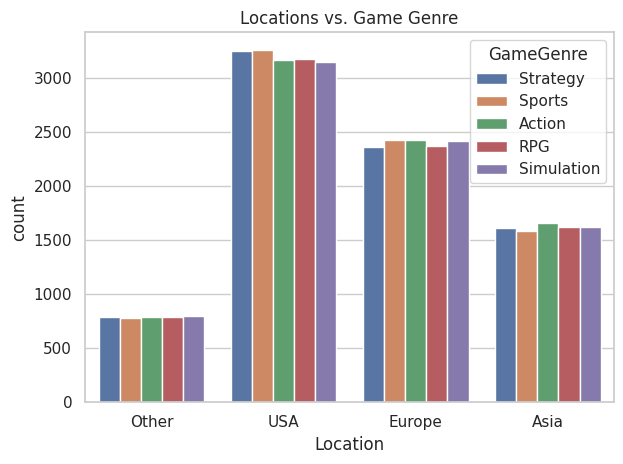

In [ ]:
sns.set(style="whitegrid")

# Plot1: Locations vs. Game Genre
sns.countplot(data=selected_data, x='Location', hue='GameGenre')
plt.title('Locations vs. Game Genre')
plt.tight_layout()
plt.show()

As shown in the figure, the number of players for different game genres is relatively similar across regions. However, there are slight variations: in the US, more people seem to prefer strategy and sports games, while in Asia, action games appear to be slightly more popular. Overall, the differences are not significant.

Let's examine the relationship between location and player levels. It is worth noting that I set the figsize parameter to make the chart clearer and more visually informative.

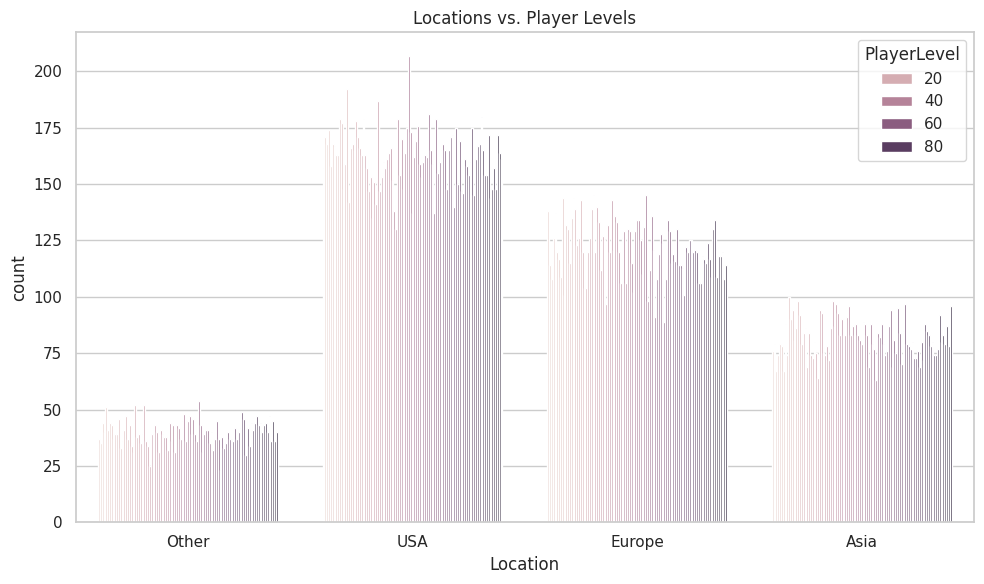

In [ ]:
# Plot2: Locations vs. Player Levels
plt.figure(figsize=(10, 6))
sns.countplot(data=selected_data, x='Location', hue='PlayerLevel')
plt.title('Locations vs. Player Levels')
plt.tight_layout()
plt.show()

Based on the figure, it can be observed that Asian players tend to have slightly more high-level players compared to those in the USA and Europe, though the difference is not significant.

Let's explore the relationship between game genre and player levels.

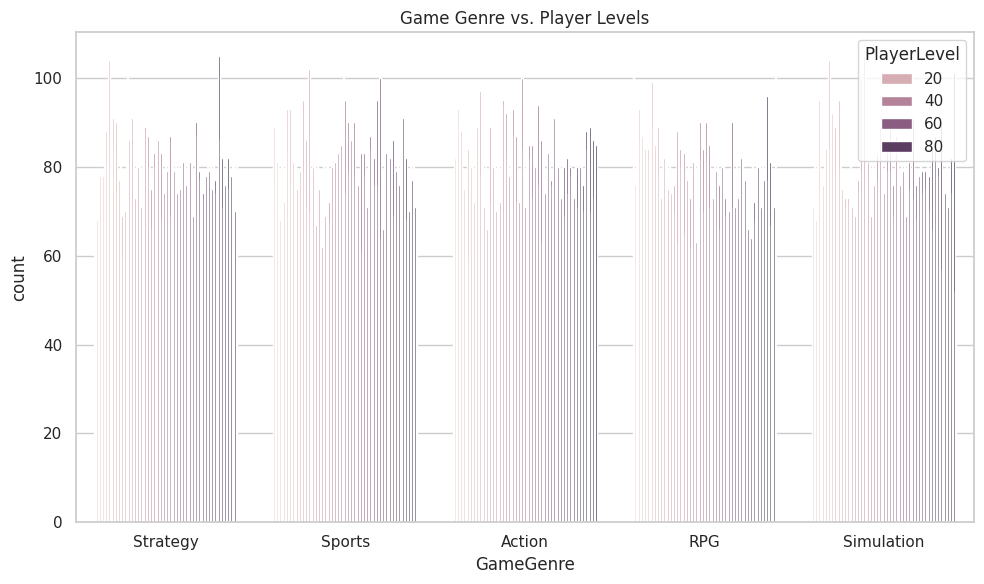

In [ ]:
# Plot3: Game Genre vs. Player Levels
plt.figure(figsize=(10, 6))
sns.countplot(data=selected_data, x='GameGenre', hue='PlayerLevel')
plt.title('Game Genre vs. Player Levels')
plt.tight_layout()
plt.show()

According to the figure, it is difficult to see any clear pattern or relationship between the two variables. Therefore, I decided to segment the data into high, medium, and low skill levels to further investigate their correlation.

<ipython-input-19-5c235ae4e0f1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['player levels group'] = selected_data['PlayerLevel'].apply(categorize_level)


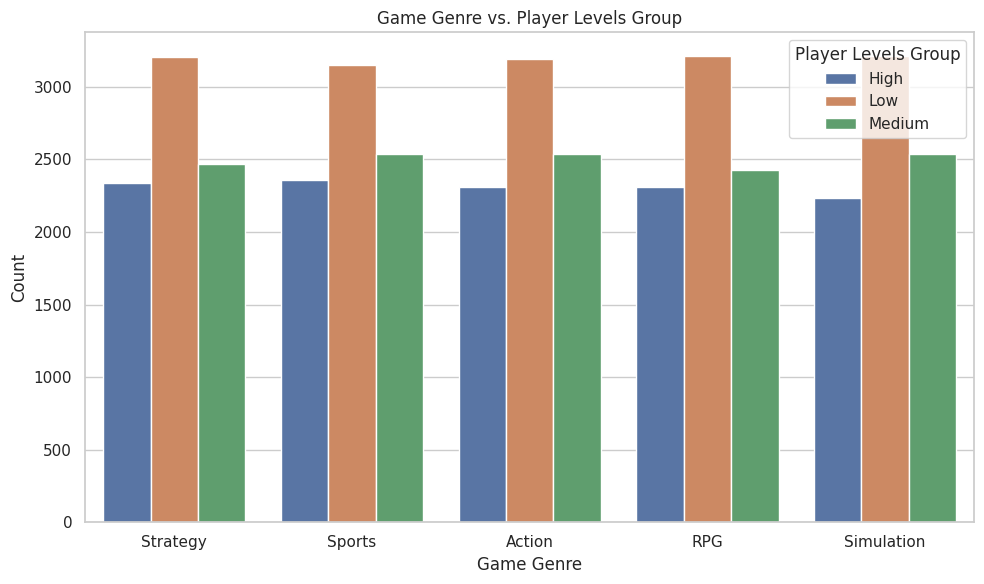

In [ ]:
# Segment the data into high, low, and medium skill levels
def categorize_level(level):
    if level < 40:
        return "Low"
    elif 40 <= level <= 70:
        return "Medium"
    else:
        return "High"

selected_data['player levels group'] = selected_data['PlayerLevel'].apply(categorize_level)

# Plot4: Game Genre vs. Player Levels Group
plt.figure(figsize=(10, 6))
sns.countplot(data=selected_data, x='GameGenre', hue='player levels group')
plt.title('Game Genre vs. Player Levels Group')
plt.xlabel('Game Genre')
plt.ylabel('Count')
plt.legend(title="Player Levels Group")
plt.tight_layout()
plt.show()

Even after segmenting the data, no significant relationship was observed. I suspect that player levels and game genres may not be strongly related.


For the next step, I wanted to explore the relationship among three variables, so I chose a heatmap as the visualization tool. First, I transformed the data into a format suitable for a heatmap. Then, to better understand the proportions of players in each region, I converted the data from counts to percentages. Finally, I used the processed data to create the heatmap.

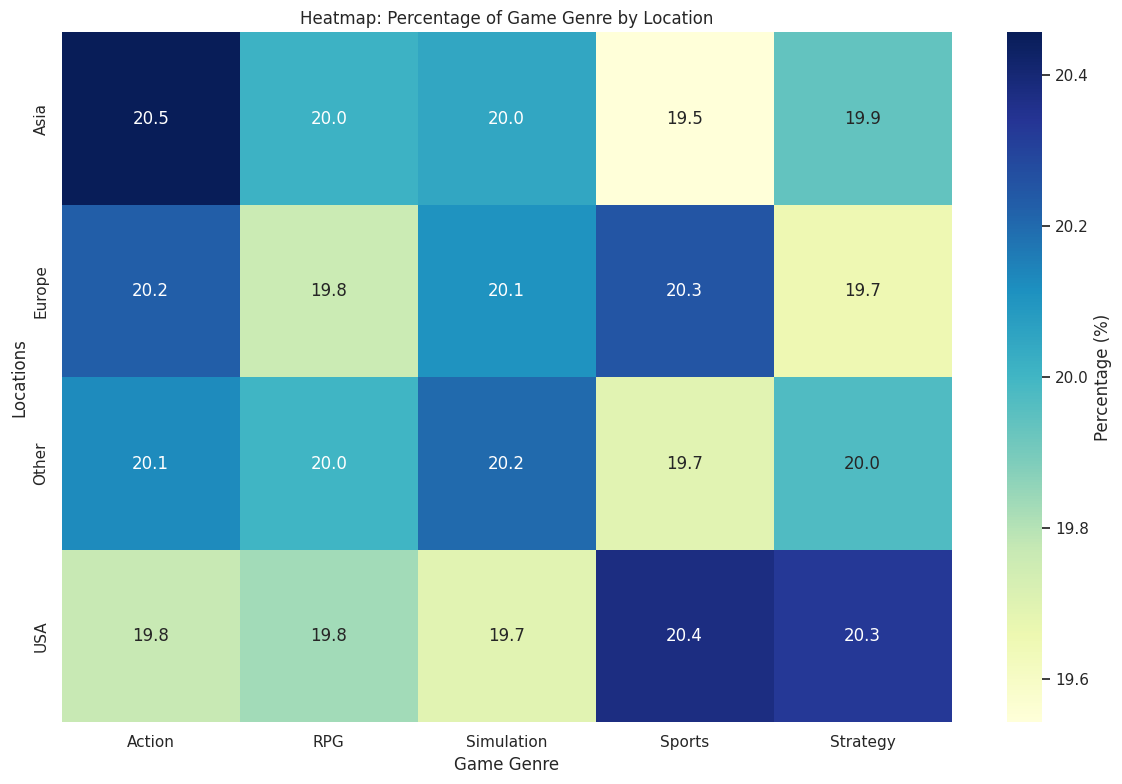

In [ ]:
# Transform the data
pivot_data = selected_data.pivot_table(
    index='Location',
    columns='GameGenre',
    values='PlayerLevel',
    aggfunc='count',
    fill_value=0
)

# Transfer to % format
percentage_data = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(percentage_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage (%)'})
plt.title("Heatmap: Percentage of Game Genre by Location")
plt.ylabel("Locations")
plt.xlabel("Game Genre")
plt.tight_layout()
plt.show()

According to the heatmap, there appears to be no meaningful relationship among the three variables. This suggests that the idea of "Do regions or countries influence players' gaming abilities?" is incorrect. To further validate this result, I conducted a multivariate ANOVA (MANOVA) analysis as a double-check.

In [ ]:
# Encoded data
encoded_data = selected_data.copy()
encoded_data['GameGenre'] = pd.Categorical(encoded_data['GameGenre']).codes
encoded_data['PlayerLevel'] = pd.Categorical(encoded_data['PlayerLevel']).codes
encoded_data['Location'] = pd.Categorical(encoded_data['Location']).codes

# Build the module of MANOVA
manova = MANOVA.from_formula('Q("GameGenre") + Q("PlayerLevel") ~ Q("Location")', data=encoded_data)
results = manova.mv_test()

print("MANOVA Results:")
print(results)

MANOVA Results:
                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept        Value  Num DF   Den DF    F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda 0.3854 2.0000 40031.0000 31914.8531 0.0000
         Pillai's trace 0.6146 2.0000 40031.0000 31914.8531 0.0000
 Hotelling-Lawley trace 1.5945 2.0000 40031.0000 31914.8531 0.0000
    Roy's greatest root 1.5945 2.0000 40031.0000 31914.8531 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
        Q("Location")      Value  Num DF   Den DF   F Value Pr > F
------------------------------------------------------------------
             Wilks' lambda 0.9999 2.0000 40031.0000  1.7239 0.1784


From the MANOVA analysis, the Wilks' Lambda for the variable "Location" was 0.9999, which is very close to 1, indicating that Location has a minimal effect on the dependent variables. Additionally, the p-value of 0.1784 is significantly higher than 0.05, meaning failed to reject the null hypothesis. In other words, Location does not have a significant joint effect on Game Genre and Player Levels, further confirming that the idea of regions or countries influencing players' gaming abilities is incorrect.

To move beyond the exploratory stage, the next steps involve broader data collection, including more variables like socioeconomic factors or gaming habits. This may help address the initial question: why Western countries excel in FPS games and Asian countries dominate in MOBA games?

# Reference
1. Parshakov, P., & Zavertiaeva, M. (2018). Determinants of performance in eSports: A country-level analysis. International Journal of Sport Finance, 13(1), 34-51.
2. Luo, X., & Chen, L. (2024). Sex differences and cultural diversity in perceptions toward eSports between American and Chinese university students. Cogent Social Sciences, 10(1), 2399932.
3. Goldstein, R. Z., & Volkow, N. D. (2002). Drug addiction and its underlying neurobiological basis: neuroimaging evidence for the involvement of the frontal cortex. American journal of Psychiatry, 159(10), 1642-1652.
4. Powers, K. L., Brooks, P. J., Aldrich, N. J., Palladino, M. A., & Alfieri, L. (2013). Effects of video-game play on information processing: A meta-analytic investigation. Psychonomic bulletin & review, 20, 1055-1079.
5. Dye, M. W., Green, C. S., & Bavelier, D. (2009). The development of attention skills in action video game players. Neuropsychologia, 47(8-9), 1780-1789.
6. Asensio, S., Romero, M. J., Romero, F. J., Wong, C., Alia‐Klein, N., Tomasi, D., ... & Goldstein, R. Z. (2010). Striatal dopamine D2 receptor availability predicts the thalamic and medial prefrontal responses to reward in cocaine abusers three years later. Synapse, 64(5), 397-402.